# SQL BUSINESS CASE STUDY

## Problem Statement:
### This business case has information of 100k orders from 2016 to 2018 made at a leading retailer in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. Analyze and provide some insights and recommendations from given data


## Structure of notebook:
> 1. Problem statement and ER Diagram
> 2. Initial exploration of dataset like checking the characteristics of data 
> 3. In-depth Exploration
> 4. Evolution of E-commerce orders in the Brazil region 
> 5. Impact on Economy 
> 6. Analysis on sales, freight and delivery time
> 7. Payment type analysis
> 8. Actionable Insights
> 9. Recommendations


### Note:
> **We will be using the sqlite3 module to load datasets to server and run queries in notebook.**  
> **The results of the queries will be saved in a dataframe and subsequent analysis will be done.**   
> **Some Datetime based analyses have been done on BigQuery/Colab and results pasted due to limitations of sqlite3**

> **In data types mentioned, object type reflects string type in sql** 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [92]:
tbl_list = ['customers', 'geolocation', 'order_items', 'payments', 'order_reviews', 'orders', 'products', 'sellers']
tbl_list

['customers',
 'geolocation',
 'order_items',
 'payments',
 'order_reviews',
 'orders',
 'products',
 'sellers']

In [4]:
#read the CSV files

customers = pd.read_csv('/Users/krishnatewari/KT Personal/Data Science/Scaler/Projects/ Dataset/customers.csv')
geolocation = pd.read_csv('/Users/krishnatewari/KT Personal/Data Science/Scaler/Projects/Dataset/geolocation.csv')
order_items = pd.read_csv('/Users/krishnatewari/KT Personal/Data Science/Scaler/Projects/Dataset/order_items.csv')
order_reviews = pd.read_csv('/Users/krishnatewari/KT Personal/Data Science/Scaler/Projects/Dataset/order_reviews.csv', encoding= 'ISO-8859-1')
orders = pd.read_csv('/Users/krishnatewari/KT Personal/Data Science/Scaler/Projects/Dataset/orders.csv')
payments = pd.read_csv('/Users/krishnatewari/KT Personal/Data Science/Scaler/Projects/Dataset/payments.csv')
products = pd.read_csv('/Users/krishnatewari/KT Personal/Data Science/Scaler/Projects/Dataset/products.csv')
sellers = pd.read_csv('/Users/krishnatewari/KT Personal/Data Science/Scaler/Projects/Dataset/sellers.csv')

In [5]:
#connect to a database
#if the db does not exist, this creates a ____.db file in the current directory

conn = sqlite3.connect("____.db") 

In [55]:
#store tables in the ____.db database:

customers.to_sql('customers', conn)
geolocation.to_sql('geolocation', conn)
order_items.to_sql('order_items', conn)
order_reviews.to_sql('order_reviews', conn)
orders.to_sql('orders', conn)
payments.to_sql('payments', conn)
products.to_sql('products', conn)
sellers.to_sql('sellers', conn)



/Users/krishnatewari/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:2872: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


## Exploratory Data Analysis:

### 1. Customers table:

In [75]:
customers.dtypes    

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [116]:
# number of rows
query = ''' SELECT
  COUNT(*) as no_of_rows
FROM customers'''
res = pd.read_sql(query, conn)
res

,no_of_rows
0,99441


In [127]:
# number of null values in customer_id

query = ''' SELECT
  COUNT(*) as no_of_null_customerid
FROM customers
where customer_id is null or trim(customer_id) = "" '''
res = pd.read_sql(query, conn)
res

,no_of_null_customerid
0,0


In [97]:
#finding number of unique customers

query = '''SELECT
  COUNT(DISTINCT customer_unique_id) as no_of_unique_customers
FROM customers'''
res = pd.read_sql(query, conn)
res

,no_of_unique_customers
0,96096


In [120]:
# number of customer cities

query = ''' SELECT
  COUNT(DISTINCT customer_city) as no_of_customer_cities
FROM customers'''
res = pd.read_sql(query, conn)
res

,no_of_customer_cities
0,4119


In [131]:
# A few customer cities covered

query = ''' SELECT
  DISTINCT customer_city as customer_cities
FROM customers
limit 5'''
res = pd.read_sql(query, conn)
res

,customer_cities
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


In [122]:
# number of customer states covered

query = ''' SELECT
  COUNT(DISTINCT customer_state) as no_of_customer_states
FROM customers'''
res = pd.read_sql(query, conn)
res

,no_of_customer_states
0,27


In [130]:
# A few customer states covered

query = ''' SELECT
  DISTINCT customer_state as customer_states
FROM customers
limit 5'''
res = pd.read_sql(query, conn)
res

,customer_states
0,SP
1,SC
2,MG
3,PR
4,RJ


### 2. Geolocations Table:

In [76]:
geolocation.dtypes

geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

In [118]:
# number of rows

query = ''' SELECT
  COUNT(*) as no_of_rows
FROM geolocation'''
res = pd.read_sql(query, conn)
res

,no_of_rows
0,1000163


In [129]:
# number of null values in geolocation_zip_code_prefix

query = ''' SELECT
  COUNT(*) as no_of_null_zipcode_prefix
FROM geolocation
where geolocation_zip_code_prefix is null or trim(geolocation_zip_code_prefix) = "" '''
res = pd.read_sql(query, conn)
res

,no_of_null_zipcode_prefix
0,0


In [119]:
# number of cities covered in dataset

query = ''' SELECT
  COUNT(DISTINCT geolocation_city) as no_of_cities
FROM geolocation'''
res = pd.read_sql(query, conn)
res

,no_of_cities
0,8011


>- Customer cities were only 4119 while dataset has 8011 cities
>- **No orders placed from roughly half of the cities**
>- Means customer distribution is non-uniform

In [124]:
# number of states covered in dataset

query = ''' SELECT
  COUNT(DISTINCT geolocation_state) as no_of_states
FROM geolocation'''
res = pd.read_sql(query, conn)
res

,no_of_states
0,27


>- Orders placed from all the states showing distribution over all the states

### 3. Seller table:

In [83]:
sellers.dtypes

seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object

In [132]:
# number of rows

query = ''' SELECT
  COUNT(*) as no_of_rows
FROM sellers'''
res = pd.read_sql(query, conn)
res

,no_of_rows
0,3095


In [133]:
# number of null values in seller_id

query = ''' SELECT
  COUNT(*) as no_of_null_seller_id
FROM sellers
where seller_id is null or trim(seller_id) = "" '''
res = pd.read_sql(query, conn)
res

,no_of_null_seller_id
0,0


In [134]:
# number of cities covered in dataset

query = ''' SELECT
  COUNT(DISTINCT seller_city) as no_of_cities
FROM sellers'''
res = pd.read_sql(query, conn)
res

,no_of_cities
0,611


>- Selling happens from only 611 cities against ~8000 total cities and ~4000 customer cities
>- It shows **sellers are concentrated in few cities only**

In [135]:
# number of states covered in dataset

query = ''' SELECT
  COUNT(DISTINCT seller_state) as no_of_states
FROM sellers'''
res = pd.read_sql(query, conn)
res

,no_of_states
0,23


>- Sellers not present in 4 out of total 27 states

### 4. Products table

In [82]:
products.dtypes

product_id                     object
product category               object
product_name_length           float64
product_description_length    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

In [136]:
# number of rows

query = ''' SELECT
  COUNT(*) as no_of_rows
FROM products'''
res = pd.read_sql(query, conn)
res

,no_of_rows
0,32951


In [137]:
# number of null values in product_id

query = ''' SELECT
  COUNT(*) as no_of_null_product_id
FROM products
where product_id is null or trim(product_id) = "" '''
res = pd.read_sql(query, conn)
res

,no_of_null_product_id
0,0


In [148]:
# Number of unique products

query = '''SELECT
  COUNT(DISTINCT product_id) as unique_products_count
FROM products'''
res = pd.read_sql(query, conn)
res

,unique_products_count
0,32951


>- Each row represents a unique product

In [149]:
# number of product categories

query = '''SELECT
  COUNT(DISTINCT product_category) as unique_product_category_count
FROM products'''
res = pd.read_sql(query, conn)
res

,unique_product_category_count
0,73


In [151]:
# few product category names examples

query = '''SELECT
  DISTINCT product_category as unique_product_categories
FROM products
limit 5'''
res = pd.read_sql(query, conn)
res

,unique_product_categories
0,perfumery
1,Art
2,sport leisure
3,babies
4,housewares


,product_category,num_of_products
0,bed table bath,3029
1,sport leisure,2867
2,Furniture Decoration,2657
3,HEALTH BEAUTY,2444
4,housewares,2335


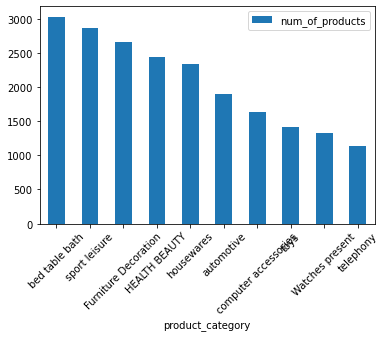

In [11]:
#number of products under each category

query = '''
SELECT product_category, count(*) as num_of_products FROM
products 
group by product_category

having product_category is not null
order by count(*) desc'''
res = pd.read_sql(query, conn)
res.head(10).plot(kind = 'bar', x = 'product_category', rot = 45)
res.head(5)

>- Most products under bed table bath category at 3029.
>- Lowest number of products seen in Kitchen portable and food coach and La Cuisine at 10 products each
>- Top 5 categories have number of products greater than 2000
>- Bottom 5 categories have 10-20 products each

In [318]:
# number of product with photos

query = '''SELECT
  COUNT(distinct product_id) as prod_with_photos
FROM products
where product_photos_qty is not null'''
res = pd.read_sql(query, conn)
res

,prod_with_photos
0,32341


,min_weight,mean_weight,median_weight,max_weight
0,0.0,2276.472488,700.0,40425.0


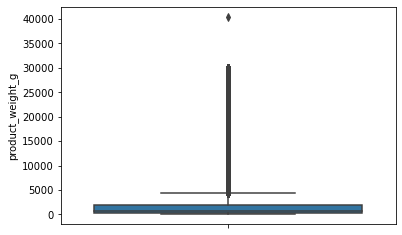

In [262]:
# min, mean, median and max weights of products

query = '''
select min_weight, mean_weight, median_weight, max_weight from
  (SELECT
    product_weight_g AS median_weight,
    AVG(product_weight_g) OVER() AS mean_weight,
    MIN(product_weight_g) OVER() AS min_weight,
    MAX(product_weight_g) OVER() AS max_weight,
    NTILE(4) OVER(ORDER BY product_weight_g) AS quantile
    
  FROM products) as temp
  where temp.quantile = 3
  limit 1
'''
res = pd.read_sql(query, conn)
res
# box plot to show outliers
query = '''
select product_weight_g 
from products'''
res1 = pd.read_sql(query, conn)

sns.boxplot(y = res1['product_weight_g'])
res

In [182]:
# min, mean, median and max length of products

query = '''
select min_length, mean_length, median_length, max_length from
  (SELECT
    product_length_cm AS median_length,
    MIN(product_length_cm) OVER() AS min_length,
    AVG(product_length_cm) OVER() AS mean_length,
    MAX(product_length_cm) OVER() AS max_length,
    NTILE(4) OVER(ORDER BY product_length_cm) AS quantile
    
  FROM products) as temp
  where temp.quantile = 3
  limit 1
'''
res = pd.read_sql(query, conn)
res

,min_length,mean_length,median_length,max_length
0,7.0,30.815078,25.0,105.0


In [184]:
# min, mean, median and max width of products

query = '''
select min_width, mean_width, median_width, max_width from
  (SELECT
    product_width_cm AS median_width,
    MIN(product_width_cm) OVER() AS min_width,
    MAX(product_width_cm) OVER() AS max_width,
    AVG(product_width_cm) OVER() AS mean_width,
    NTILE(4) OVER(ORDER BY product_width_cm) AS quantile
    
  FROM products) as temp
  where temp.quantile = 3
  limit 1
'''
res = pd.read_sql(query, conn)
res

,min_width,mean_width,median_width,max_width
0,6.0,23.196728,20.0,118.0


In [186]:
# min, mean, median and max height of products

query = '''
select min_height, mean_height, median_height, max_height from
  (SELECT
    product_height_cm AS median_height,
    MIN(product_height_cm) OVER() AS min_height,
    MAX(product_height_cm) OVER() AS max_height,
    AVG(product_height_cm) OVER() AS mean_height,
    NTILE(4) OVER(ORDER BY product_height_cm) AS quantile
    
  FROM products) as temp
  where temp.quantile = 3
  limit 1
'''
res = pd.read_sql(query, conn)
res

,min_height,mean_height,median_height,max_height
0,2.0,16.937661,13.0,105.0


>- Mean weight is much higher than median weight meaning **presence of outliers in product weight column.**
>- Difference between mean and median of dimensions like legth, height and width are low showing absence of outliers

### 5. Orders Table:

In [81]:
orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

>- the date based columns order_purchase_timestamp','order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date' **are of TIMESTAMP sql type**
>- We can use sql datetime functions to extract results

In [187]:
# number of rows

query = ''' SELECT
  COUNT(*) as no_of_rows
FROM orders'''
res = pd.read_sql(query, conn)
res

,no_of_rows
0,99441


In [188]:
# number of null values in order_id

query = ''' SELECT
  COUNT(*) as no_of_null_order_id
FROM orders
where order_id is null or trim(order_id) = "" '''
res = pd.read_sql(query, conn)
res

,no_of_null_order_id
0,0


In [190]:
# Number of orders

query = '''SELECT
  COUNT(DISTINCT order_id) as no_of_orders
FROM orders
'''
res = pd.read_sql(query, conn)
res

,no_of_orders
0,99441


> All the rows represent unique orders

In [258]:
# Number of orders under each type of order status

query = '''SELECT
  order_status, COUNT(*) as count_orders
FROM orders
group by order_status
order by count(*) desc
'''
res = pd.read_sql(query, conn)
res

,order_status,count_orders
0,delivered,96478
1,shipped,1107
2,canceled,625
3,unavailable,609
4,invoiced,314
5,processing,301
6,created,5
7,approved,2


>- Most orders are delivered and out of remaining approx 3000 orders, 1100 are shipped.
>- Almost 1200 are cancelled or unavailable

In [201]:
# range of dates of order_purchase_timestamp

query = '''SELECT
  MIN(DATE(order_purchase_timestamp)) first_purchase_date,
  MAX(DATE(order_purchase_timestamp)) last_purchase_date,
  MIN(DATE(order_delivered_customer_date)) first_delivered_date,
  MAX(DATE(order_delivered_customer_date)) last_delivered_date
FROM orders'''
res = pd.read_sql(query, conn)
res

,first_purchase_date,last_purchase_date,first_delivered_date,last_delivered_date
0,2016-09-04,2018-10-17,2016-10-11,2018-10-17



>- Rest of the analysis on this table will be done in In-Depth Exploration

### 6. Order_items table

In [77]:
order_items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

>- **shipping_limit_date is of timestamp sql type**

In [237]:
# number of rows

query = ''' SELECT
  COUNT(*) as no_of_rows
FROM order_items'''
res = pd.read_sql(query, conn)
res

,no_of_rows
0,112650


In [238]:
# number of null values in order_id

query = ''' SELECT
  COUNT(*) as no_of_null_order_id
FROM order_items
where order_id is null or trim(order_id) = "" '''
res = pd.read_sql(query, conn)
res

,no_of_null_order_id
0,0


In [242]:
# Number of orders

query = '''SELECT
  COUNT(DISTINCT order_id) as no_of_orders
FROM order_items
'''
res = pd.read_sql(query, conn)
res

,no_of_orders
0,98666


> 98000 of the 112000 rows had unique orders

,min_price,mean_price,median_price,max_price
0,0.85,120.653739,74.99,6735.0


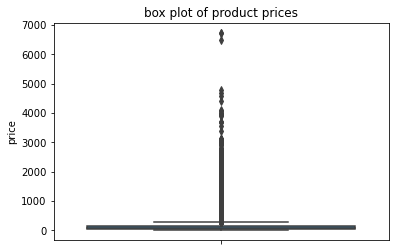

In [298]:
# min, mean, median and max price of products

query = '''
select min_price, mean_price, median_price, max_price from
  (SELECT
    price AS median_price,
    MIN(price) OVER() AS min_price,
    MAX(price) OVER() AS max_price,
    AVG(price) OVER() AS mean_price,
    NTILE(4) OVER(ORDER BY price) AS quantile
    
  FROM order_items) as temp
  where temp.quantile = 3
  limit 1
'''
res = pd.read_sql(query, conn)

query = '''
select price 
from order_items'''
res1 = pd.read_sql(query, conn)

sns.boxplot(y = res1['price'])        # box plot to show presence of outliers
plt.title('box plot of product prices')
res

>- mean and median of price of items are far from each other hinting at presence of outliers
>- Presence of outliers verified with box plot

In [245]:
# min, mean, median and max freight_value of products

query = '''
select min_freight_value, mean_freight_value, median_freight_value, max_freight_value from
  (SELECT
    freight_value AS median_freight_value,
    MIN(freight_value) OVER() AS min_freight_value,
    MAX(freight_value) OVER() AS max_freight_value,
    AVG(freight_value) OVER() AS mean_freight_value,
    NTILE(4) OVER(ORDER BY freight_value) AS quantile
    
  FROM order_items) as temp
  where temp.quantile = 3
  limit 1
'''
res = pd.read_sql(query, conn)
res

,min_freight_value,mean_freight_value,median_freight_value,max_freight_value
0,0.0,19.99032,16.26,409.68


### 7. Order_reviews table:

In [80]:
order_reviews.dtypes

review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_creation_date       object
review_answer_timestamp    object
dtype: object

>- review_creation_date and review_answer_timestamp are of timestamp sql data type

In [264]:
# number of rows

query = ''' SELECT
  COUNT(*) as no_of_rows
FROM order_reviews'''
res = pd.read_sql(query, conn)
res

,no_of_rows
0,99224


In [265]:
# number of null values in review_id

query = ''' SELECT
  COUNT(*) as no_of_null_review_id
FROM order_reviews
where review_id is null or trim(review_id) = "" '''
res = pd.read_sql(query, conn)
res

,no_of_null_review_id
0,0


In [266]:
# number of reviews

query = ''' SELECT
  COUNT(distinct review_id) as no_of_reviews
FROM order_reviews'''
res = pd.read_sql(query, conn)
res

,no_of_reviews
0,98410


> Out 99224 rows, 98410 are unique reviews

,review_score,count
0,1,11424
1,2,3151
2,3,8179
3,4,19142
4,5,57328


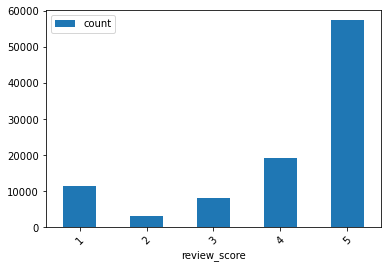

In [281]:
# number of reviews for each review score

query = '''
SELECT
  review_score, COUNT(*) as count
FROM
  order_reviews
GROUP BY
  review_score'''
res = pd.read_sql(query, conn)

res.plot(kind = 'bar', x= 'review_score', y= 'count', rot = 45)
res

>- **Most orders got a 5 review_score** followed by 4.

In [284]:
# Count of reviews with comments

query = '''
select count(*) as count_reviews_with_comment
from order_reviews
where review_comment_title is not null 
'''
res = pd.read_sql(query, conn)
res

,count_reviews_with_comment
0,11549


>- Only 11549 reviews out of ~99000 reviews had title in it

### 8. Payments table:


In [78]:
payments.dtypes

order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

In [287]:
# number of rows

query = ''' SELECT
  COUNT(*) as no_of_rows
FROM payments'''
res = pd.read_sql(query, conn)
res

,no_of_rows
0,103886


In [288]:
# number of null values in order_id

query = ''' SELECT
  COUNT(*) as no_of_null_order_id
FROM payments
where order_id is null or trim(order_id) = "" '''
res = pd.read_sql(query, conn)
res

,no_of_null_order_id
0,0


,min_no_of_installments,avg_no_of_installments,max_no_of_installments
0,0,3.0,24


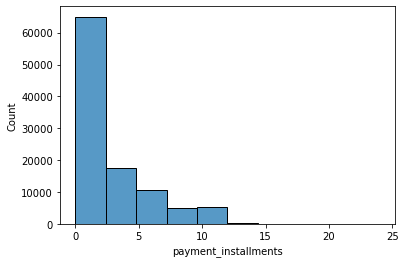

In [299]:
# analysis of number of installments

query = '''
select 
min(payment_installments) as min_no_of_installments,
round(avg(payment_installments),0) as avg_no_of_installments,
max(payment_installments) as max_no_of_installments
from payments'''

res = pd.read_sql(query, conn)

query = ''' select payment_installments from payments'''
res1 = pd.read_sql(query, conn)
sns.histplot(res1['payment_installments'], bins = 10)
res

,min_payment_value,avg_payment_value,max_payment_value
0,0.0,154.1,13664.08


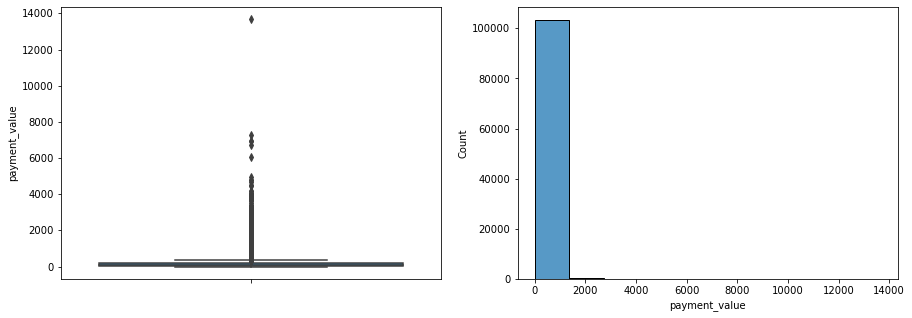

In [309]:
# analysis of payment_value

query = '''
select 
min(payment_value) as min_payment_value,
round(avg(payment_value),2) as avg_payment_value,
max(payment_value) as max_payment_value
from payments'''

res = pd.read_sql(query, conn)

query = ''' select payment_value from payments'''
res1 = pd.read_sql(query, conn)

plt.figure(figsize = [15,5])
plt.subplot(1,2,1)
sns.boxplot(y = res1['payment_value'])
plt.subplot(1,2,2)
sns.histplot(x = res1['payment_value'], bins = 10)
res

>- Almost 100000 payment values lie in the less than 1000 range
>- Presence of outliers scene in the boxplot

,payment_type,count_of_payment_type
0,credit_card,76795
1,UPI,19784
2,voucher,5775
3,debit_card,1529
4,not_defined,3


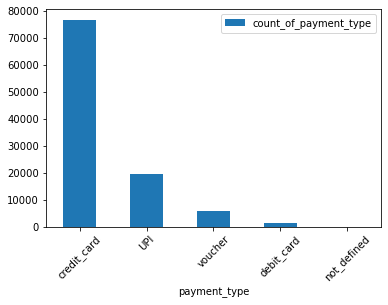

In [313]:
# number of orders for each payment type

query = '''
select payment_type, count(*) as count_of_payment_type
from payments
group by payment_type
order by count(*) desc
'''

res = pd.read_sql(query, conn)
res.plot(kind = 'bar', x = 'payment_type', y = 'count_of_payment_type', rot = 45)
res

## In-Depth Exploration
### Question: Is there a growing trend on e-commerce in Brazil? How can we describe a complete scenario? Can we see some seasonality with peaks at specific months?

In [ ]:
# number of orders for each month and its plot

query = '''
SELECT
  *
FROM (
  SELECT
    EXTRACT(YEAR FROM DATETIME(order_purchase_timestamp)) AS year,
    EXTRACT(MONTH FROM DATETIME(order_purchase_timestamp)) AS month,
    COUNT(DISTINCT order_id) AS order_in_month
  FROM
    `scaler-case-study.orders`
  GROUP BY
    EXTRACT(YEAR FROM DATETIME(order_purchase_timestamp)),
    EXTRACT(month FROM DATETIME(order_purchase_timestamp))) x

ORDER BY
  x.year, x.month
'''

### Query result and plot from BigQuery/Colab
|index|year|month|order\_in\_month|
|---|---|---|---|
|0|2016|9|4|
|1|2016|10|324|
|2|2016|12|1|
|3|2017|1|800|
|4|2017|2|1780|
|5|2017|3|2682|
|6|2017|4|2404|
|7|2017|5|3700|
|8|2017|6|3245|
|9|2017|7|4026|
|10|2017|8|4331|

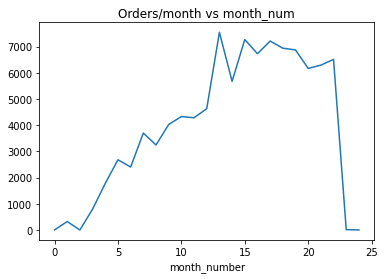



In [ ]:
# number of orders for each week and its plot
query = '''
SELECT
  *
FROM (
  SELECT
    EXTRACT(YEAR FROM DATETIME(order_purchase_timestamp)) AS year,
    EXTRACT(week FROM DATETIME(order_purchase_timestamp)) AS week,
    COUNT(DISTINCT order_id) AS order_in_week
  FROM
    `scaler-case-study.orders`
  GROUP BY
    EXTRACT(week FROM DATETIME(order_purchase_timestamp)),
    EXTRACT(YEAR FROM DATETIME(order_purchase_timestamp))) x
ORDER BY
  x.year, x.week'''


|index|year|week|order\_in\_week|      
|---|---|---|---|
|0|2016|36|2|
|1|2016|37|2|
|2|2016|40|258|
|3|2016|41|65|
|4|2016|42|1|
|5|2016|51|1|
|6|2017|1|40|
|7|2017|2|72|
|8|2017|3|180|
|9|2017|4|350|
|10|2017|5|427|


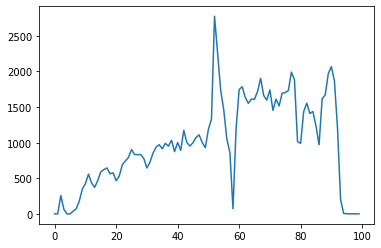

>- **The count of orders per week in Brazil has been increasing almost consistently over the period**
>- There are few very high peaks and dips in the plot which can be ignored as they might be caused due to specific time of the year related reasons
>- The dip in curve towards the end can be ignored as that is due to lack of data in months post August 2018

In [ ]:
# Analysing weekly payment value with time

query = '''
SELECT
  *
FROM (
  SELECT
    EXTRACT(YEAR FROM DATETIME(o.order_purchase_timestamp)) AS year,
    EXTRACT(week FROM DATETIME(o.order_purchase_timestamp)) AS week,
    ROUND(SUM(p.payment_value),2) as weekly_payment_value
  FROM
    project.payments AS p
  LEFT JOIN
    project.orders AS o
  ON
    o.order_id = p.order_id
  GROUP BY
    EXTRACT(week FROM DATETIME(order_purchase_timestamp)),
    EXTRACT(YEAR FROM DATETIME(order_purchase_timestamp))) x
ORDER BY
  x.year, x.week'''

|index|year|week|weekly\_payment\_value|
|---|---|---|---|
|0|2016|36|211\.29|
|1|2016|37|40\.95|
|2|2016|40|50201\.28|
|3|2016|41|8827\.21|
|4|2016|42|61\.99|
|5|2016|51|19\.62|
|6|2017|1|3143\.54|
|7|2017|2|13131\.66|
|8|2017|3|26773\.56|
|9|2017|4|63068\.99|
|10|2017|5|80744\.18|

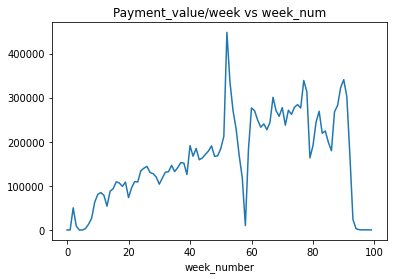

>- **Weekly payment_value for orders also follows a similar patter as weekly number of orders**
>- This confirms our assessment that **retailer has seen an almost consistent rise in e-commerce** through the period September 2016 to Auguest 2018

### Checking seasonality with peak in certain months

,month,orders_per_month
0,01,8069
1,02,8508
2,03,9893
3,04,9343
4,05,10573
5,06,9412
6,07,10318
7,08,10843
8,09,4305
9,10,4959


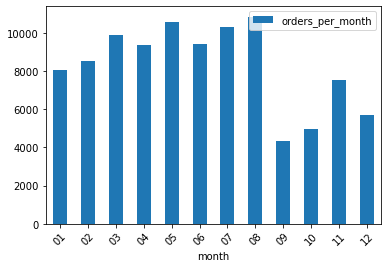

In [236]:
# number of orders per month

query = '''select * 
from 
(SELECT
strftime('%m', order_purchase_timestamp) as month, 
count(*) as orders_per_month
FROM orders
group by strftime('%m', order_purchase_timestamp)) t
order by t.month'''

res = pd.read_sql(query, conn)
res.plot(kind = 'bar', x = 'month', y = 'orders_per_month', rot = 45)
res

>- Most orders **concentrated between January and August** 
>- Highest orders scene between the months **May to August**
>- September to December see lower orders and reasons need to be investigated behind the same

### Complete Scenario on E-commerce:
>- The sale value and number of orders are increasing by huge margins 
>- The business shows peak in certain months as mentioned above 
>- There are extraordinarily high peaks in 1-2 weeks which could be due to festival season or some other region specific reason. 
>- Similarly extraordinarily low values are also observed for 1-2 weeks in 2017 and post August 2018

### Question: What time do Brazilian customers tend to buy (Dawn, Morning, Afternoon or Night)?

In [ ]:
query = '''
WITH
  order_per_hour AS (
  SELECT
    EXTRACT(HOUR FROM DATETIME(order_purchase_timestamp)) AS hour,
    COUNT(DISTINCT order_id) AS num_of_orders
  FROM
    `scaler-case-study.orders`
  GROUP BY
    EXTRACT(HOUR FROM DATETIME(order_purchase_timestamp))),
  
  time_of_day_table AS (
  SELECT
    *,
    CASE
      WHEN hour BETWEEN 4 AND 8 THEN 'Dawn'
      WHEN hour BETWEEN 9 AND 12 THEN 'Morning'
      WHEN hour BETWEEN 12 AND 16 THEN 'Afternoon'
      WHEN hour BETWEEN 17 AND 20 THEN 'Evening'
    ELSE 'Night'
  END AS time_of_day
  FROM order_per_hour)

SELECT
  time_of_day,
  SUM(num_of_orders) AS Num_Of_Orders
FROM time_of_day_table
GROUP BY time_of_day
order by Num_Of_Orders desc''' 

### Results:
|index|time\_of\_day|Num\_Of\_Orders|
|---|---|---|
|0|Afternoon|26216|
|1|Evening|24094|
|2|Morning|23535|
|3|Night|20502|
|4|Dawn|5094|

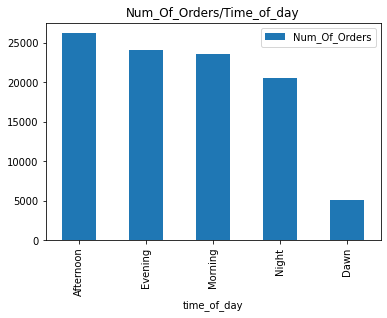

>- Dawn: 4-8 AM; Morning: 9-12; Afternoon: 12-4 PM; Evening: 5-8 PM; Night: 8 PM-4 AM
>- Highest number of orders placed during afternoon time
>- Lowest number of orders placed at Dawn
>- Morning, Evening and night have almost similar number of orders placed

## Evolution of E-commerce orders in the Brazil region:
### Question: Month on month orders by region, states

In [ ]:
# Month on month number of orders and percentge change by state

query = '''
select x.*,  

round(((x.num_of_orders_per_state_per_month - lag(x.num_of_orders_per_state_per_month) 
over(partition by x.customer_state order by x.YEAR, x.month))
/ lag(x.num_of_orders_per_state_per_month) 
over(partition by x.customer_state order by x.YEAR, x.month)*100),2) 
as month_on_month_perc_change

from
(SELECT c.customer_state,
  EXTRACT(YEAR FROM DATETIME(order_purchase_timestamp)) AS year,
  EXTRACT(MONTH FROM DATETIME(order_purchase_timestamp)) AS month,
  count(o.order_id) as num_of_orders_per_state_per_month 
  from project.orders AS o
LEFT JOIN
  project.customers AS c
ON
  o.customer_id = c.customer_id
group by c.customer_state,
  EXTRACT(YEAR FROM DATETIME(order_purchase_timestamp)),
  EXTRACT(MONTH FROM DATETIME(order_purchase_timestamp))
  )x
  order by x.customer_state, x.YEAR, x.month'''

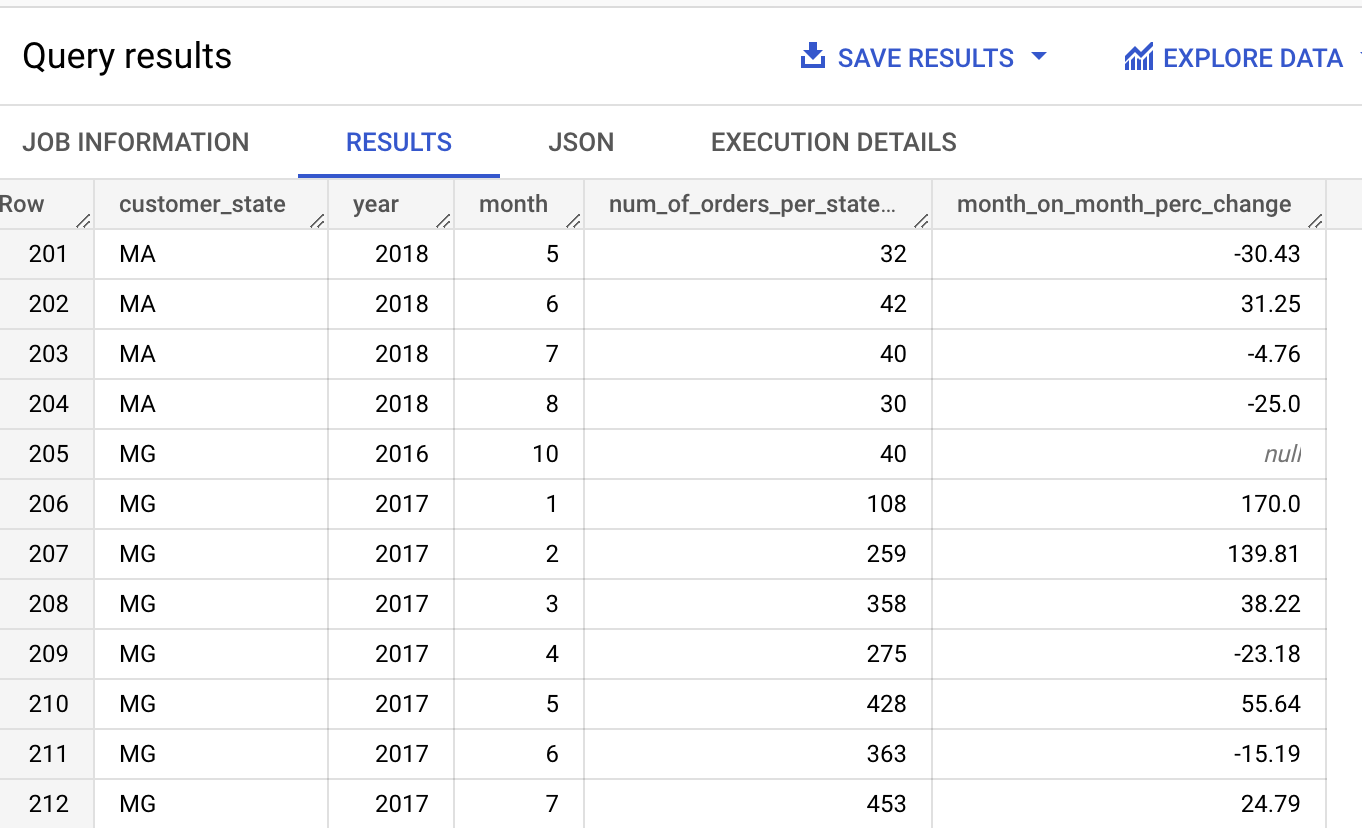

>- **Above snapshot of output provides month on month sales** in terms of 
>>- actual number of orders per state per month 
>>- percentage change in orders on a month on month basis for each state

In [ ]:
# Month on month number of orders and percentge change by zip code 

query = '''
select x.*,

x.num_of_orders_per_region_per_month - lag(x.num_of_orders_per_region_per_month) 
over(partition by x.zip_code order by x.YEAR, x.month)
/ lag(x.num_of_orders_per_region_per_month) 
over(partition by x.zip_code order by x.YEAR, x.month)*100 
as month_on_month_perc_change

from
(SELECT g.geolocation_zip_code_prefix as zip_code,
EXTRACT(YEAR FROM DATETIME(order_purchase_timestamp)) AS year,
EXTRACT(MONTH FROM DATETIME(order_purchase_timestamp)) AS month,
count(o.order_id) as num_of_orders_per_region_per_month

FROM project.orders as o inner join `project.customers` as c 
on o.customer_id = c.customer_id

left join project.geolocation as g 
on c.customer_zip_code_prefix = g.geolocation_zip_code_prefix

group by g.geolocation_zip_code_prefix, EXTRACT(YEAR FROM DATETIME(order_purchase_timestamp)), 
EXTRACT(MONTH FROM DATETIME(order_purchase_timestamp))) x
where x.zip_code is not null
order by x.zip_code, x.YEAR, x.month
limit 1000'''

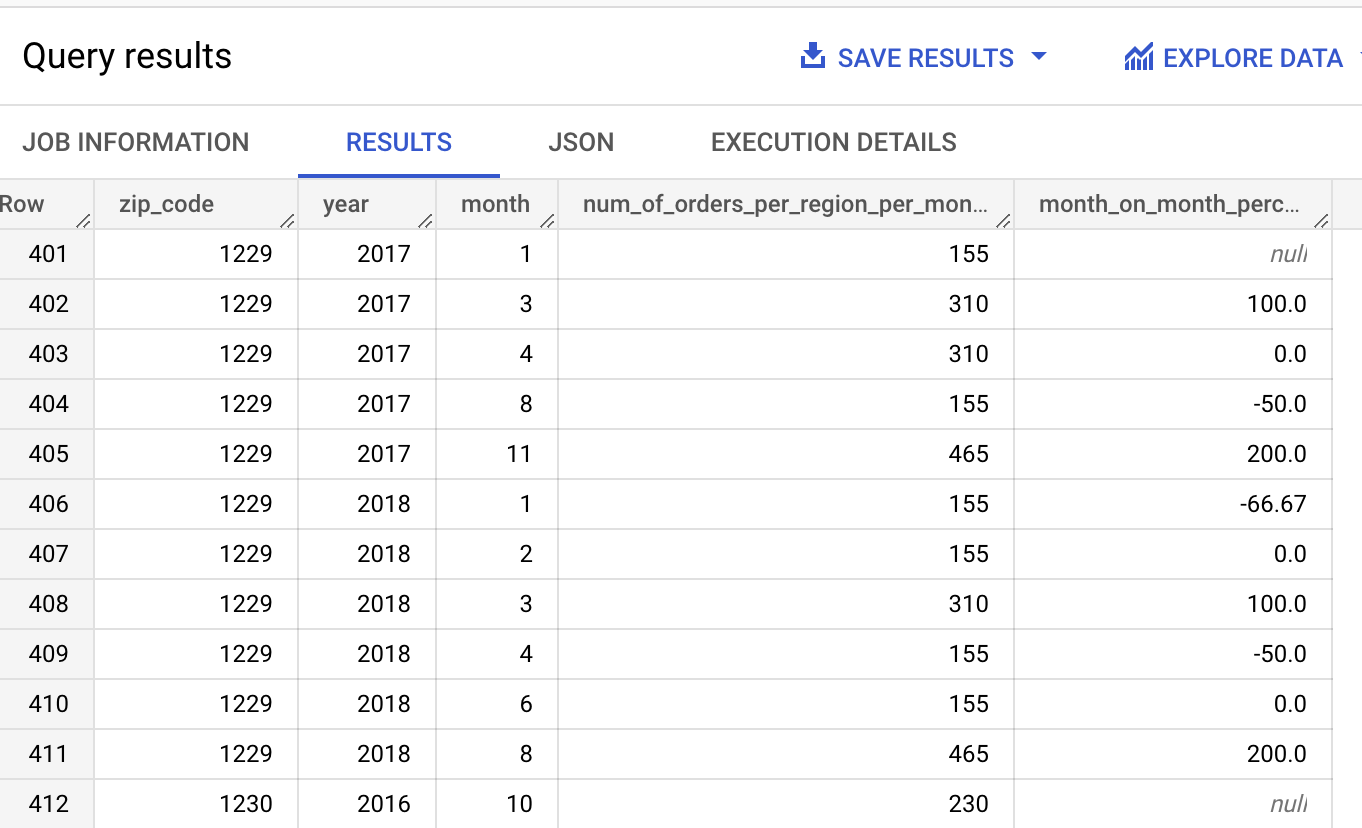

>- Above snapshot provides a month on month orders in terms of number of orders and monthly percentage change for **each region represented by zip code**.

### Question: How are customers distributed in Brazil?

,customer_city,no_of_customer
0,sao paulo,14984
1,rio de janeiro,6620
2,belo horizonte,2672
3,brasilia,2069
4,curitiba,1465


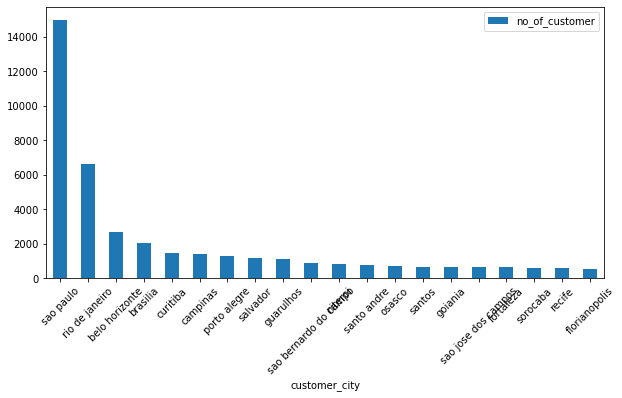

In [357]:
# Distribution of unique customers in cities

query = '''
SELECT  
customer_city,
count(distinct customer_unique_id) as no_of_customer
FROM customers 
group by customer_city
order by count(customer_unique_id) desc'''

res = pd.read_sql(query, conn)
res.head(20).plot(kind= 'bar', x= 'customer_city', y = 'no_of_customer', rot = 45, figsize = [10,5])
res.head()

>- Highest number of customers are from populated cities like sao paulo and rio de janeiro.
>- Sao paulo has disproportionately high customers at 15540 followed by Rio de janeiro at 6800
>- Cities immediately following these have less than 2000
>- Many cities in the lower end of dataset have only 1 customer

,customer_state,no_of_customer
0,SP,40302
1,RJ,12384
2,MG,11259
3,RS,5277
4,PR,4882


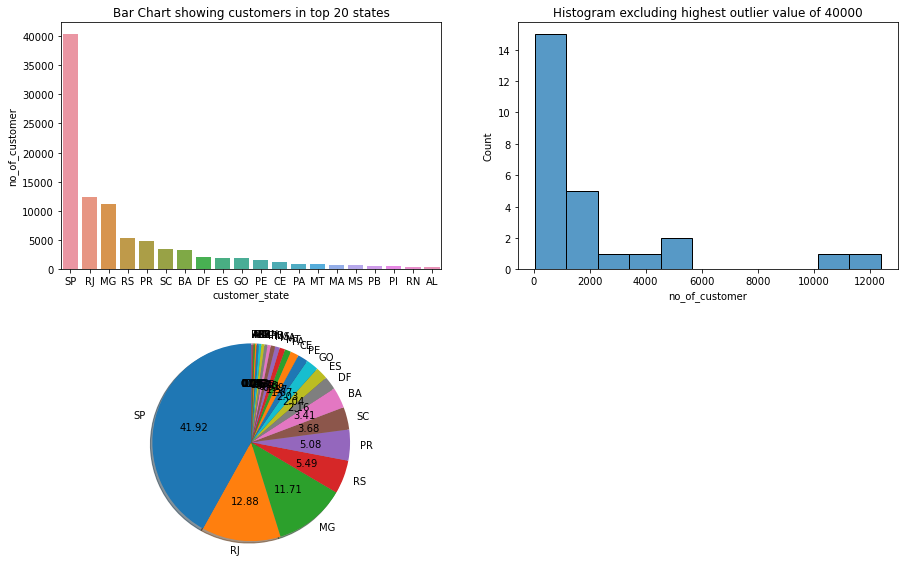

In [399]:
# Distribution of unique customers in states

query = '''
SELECT  
distinct customer_state,
count(distinct customer_unique_id) as no_of_customer
FROM customers 
group by customer_state
order by count(customer_unique_id) desc'''

res = pd.read_sql(query, conn)
plt.figure(figsize= [15,10])
plt.subplot(2,2,1)
sns.barplot(x = 'customer_state', y = 'no_of_customer', data = res.head(20))
plt.title('Bar Chart showing customers in top 20 states')
plt.subplot(2,2,2)
sns.histplot(x = res['no_of_customer'][1:])
plt.title('Histogram excluding highest outlier value of 40000')
plt.subplot(2,2,3)
plt.pie(res['no_of_customer'],
       labels = res['customer_state'],
       startangle = 90,         #to change starting angle of first value
       shadow = True, autopct='%.2f')
res.head()

>- State SP has the most customers at 40300 which is more than 3 times of following state RJ at 12300
>- As seen in histogram, almost 24 states have no_of_customers less than 5000
>- Out of that almost 15 states have customers less than 1000
>- **This shows that majority of customers (almost 64000) are residing in 3 states and rest of 30000 customers are distributed in remaining 24 states**

## Impact on Economy: Money movement by e-commerce by looking at order prices, freight and others
### Quesion: Get % increase in cost of orders from 2017 to 2018 (include months between Jan to Aug only)

In [ ]:
# Getting month on month change 
# in percentage and absolute terms in payment value 
# for orders between january and august only

query = '''
select x.*,
round(((x.payment_value - 
lag(x.payment_value) over(order by x.YEAR, x.month)) /
lag(x.payment_value) over(order by x.YEAR, x.month))*100,2) 
as month_on_month_perc_change

from
(SELECT 
EXTRACT(YEAR FROM DATETIME(o.order_purchase_timestamp)) AS year,
EXTRACT(MONTH FROM DATETIME(o.order_purchase_timestamp)) AS month,
round(sum(p.payment_value),2) as monthly_payment_value

FROM project.orders as o 
left join project.payments as p on o.order_id = p.order_id

group by EXTRACT(YEAR FROM DATETIME(o.order_purchase_timestamp)), 
EXTRACT(MONTH FROM DATETIME(o.order_purchase_timestamp)) )x
where x.month between 1 and 8
order by x.YEAR, x.month'''

### Query result:
|index|year|month|monthly\_payment\_value|month\_on\_month\_perc\_change|
|---|---|---|---|---|
|0|2017|1|138488\.04|NaN|
|1|2017|2|291908\.01|110\.78|
|2|2017|3|449863\.6|54\.11|
|3|2017|4|417788\.03|-7\.13|
|4|2017|5|592918\.82|41\.92|
|5|2017|6|511276\.38|-13\.77|
|6|2017|7|592382\.92|15\.86|
|7|2017|8|674396\.32|13\.84|
|8|2018|1|1115004\.18|65\.33|
|9|2018|2|992463\.34|-10\.99|
|10|2018|3|1159652\.12|16\.85|
|11|2018|4|1160785\.48|0\.1|
|12|2018|5|1153982\.15|-0\.59|
|13|2018|6|1023880\.5|-11\.27|
|14|2018|7|1066540\.75|4\.17|
|15|2018|8|1022425\.32|-4\.14|

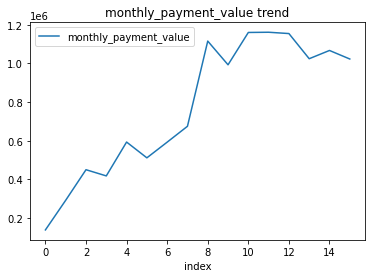

>- order payment value by customers on monthly basis plotted above for years 2017 and 2018 betweeen months January to August
>- It can be seen that payment value **increased consistently from January 2017 to january 2018** 
>- A flattening of curve can be seen **from January 2018 onwards showing slowing down of sale**
>- january month in both the years see a huge rise in sales 

In [ ]:
# % increase in cost of orders on yearly basis
# Considering months between january and august
query = '''
select x.year, round(sum(payment_value),2) as payment_value,
round(((sum(payment_value) - 
lag(sum(payment_value)) over(order by x.year)) /
lag(sum(payment_value)) over(order by x.year))*100,2) 
as year_onyear_perc_change

from
(SELECT 
EXTRACT(YEAR FROM DATETIME(o.order_purchase_timestamp)) AS year,
EXTRACT(MONTH FROM DATETIME(o.order_purchase_timestamp)) AS month,
round(sum(p.payment_value),2) as payment_value
FROM project.orders as o 
left join project.payments as p on o.order_id = p.order_id

group by EXTRACT(YEAR FROM DATETIME(o.order_purchase_timestamp)), 
EXTRACT(MONTH FROM DATETIME(o.order_purchase_timestamp)) )x  
where x.month between 1 and 8
group by x.YEAR
order by x.year 

'''

### Query results:

|index|year|payment\_value|year\_onyear\_perc\_change|
|---|---|---|---|
|0|2017|3669022\.12|NaN|
|1|2018|8694733\.84|136\.98|

>- **2018 saw an 136% rise in payment value** compared to 2017 between Jan-Aug of each year
>- But as seen previously from monthly chart, **rise mainly happened in January 2018** and sale value was flat or downtrending in rest of the year

### Question: Mean & Sum of price and freight value by customer state

In [ ]:
query = '''
select * from

(select 
c.customer_state, round(avg(oi.price),2) as mean_price, 
round(sum(oi.price),2) as sum_price,
round(avg(oi.freight_value),2) as mean_freight_value, 
round(sum(oi.freight_value),2) as sum_freight_value
from
project.order_items as oi join project.orders as o on oi.order_id = o.order_id
join project.customers as c on c.customer_id = o.customer_id

group by c.customer_state) as x
order by x.sum_price desc'''

### Query results:

|index|customer\_state|mean\_price|sum\_price|mean\_freight\_value|sum\_freight\_value|
|---|---|---|---|---|---|
|0|SP|109\.65|5202955\.05|15\.15|718723\.07|
|1|RJ|125\.12|1824092\.67|20\.96|305589\.31|
|2|MG|120\.75|1585308\.03|20\.63|270853\.46|
|3|RS|120\.34|750304\.02|21\.74|135522\.74|
|4|PR|119\.0|683083\.76|20\.53|117851\.68|
|5|SC|124\.65|520553\.34|21\.47|89660\.26|
|6|BA|134\.6|511349\.99|26\.36|100156\.68|
|7|DF|125\.77|302603\.94|21\.04|50625\.5|
|8|GO|126\.27|294591\.95|22\.77|53114\.98|
|9|ES|121\.91|275037\.31|22\.06|49764\.6|
|10|PE|145\.51|262788\.03|32\.92|59449\.66|

>- Top 10 customer states by sum of price of order items shown above
>- sum and mean values of price of order items and freight value shown in columns
>- **Highest priced products ordered by customers from SP** at 52 Lakhs followed by RJ by a high margin at 18 Lakhs
>- **Highest mean price of products ordered by customers from PE although they are at lowest in terms of total price**. 
>- This shows fewer products of higher worth ordered from PE

## Analysis on sales, freight and delivery time
### Question: Calculate days between purchasing, delivering and estimated delivery and create columns time_to_delivery and diff_estimated_delivery

In [ ]:
query = '''
select * from
(SELECT order_id,
date_diff(order_delivered_customer_date, order_purchase_timestamp,day) 
as time_to_delivery,
date_diff(order_estimated_delivery_date, order_delivered_customer_date, day) 
as diff_estimated_delivery

FROM project.orders
) x
where x.time_to_delivery is not null'''

### Query result:

|index|order\_id|time\_to\_delivery|diff\_estimated\_delivery|
|---|---|---|---|
|0|770d331c84e5b214bd9dc70a10b829d0|7|45|
|1|1950d777989f6a877539f53795b4c3c3|30|-12|
|2|2c45c33d2f9cb8ff8b1c86cc28c11c30|30|28|
|3|dabf2b0e35b423f94618bf965fcb7514|7|44|
|4|8beb59392e21af5eb9547ae1a9938d06|10|41|
|5|65d1e226dfaeb8cdc42f665422522d14|35|16|
|6|c158e9806f85a33877bdfd4f607b72e7|23|9|
|7|b60b53ad0bb7dacacf2989fe27ad567a|12|-5|
|8|c830f223aae08493ebecb52f29aa48ca|12|12|
|9|a8aa2cd070eeac7e4368cae3d8222e2b|7|1|

>- time_to_delivery = order_delivered_customer_date - order_purchase_timestamp  
>- **shows days taken to deliver product**
>- diff_estimated_delivery = order_estimated_delivery_date - order_delivered_customer_date
>- **positive means delivery done earlier than estimated**
>- Delated delivery vs on time plotted below based on above shown result

>- Most of the days, delivery was made before the estimated time
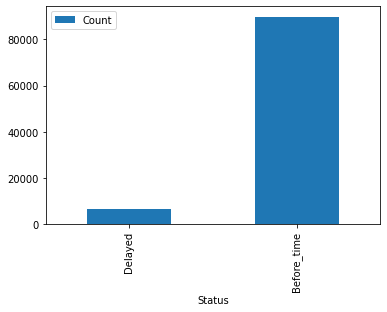

>**diff_estimated_delivery vs time_to_delivery**
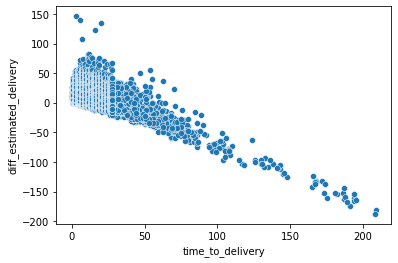
>- As seen in scatter plot, **deliveries get delayed whenever time to delivery is higher**

### Question: Group data by state, take mean of freight_value, time_to_delivery, diff_estimated_delivery

In [ ]:
query = '''
with time_delivery as (
select * from
(SELECT order_id,
date_diff(order_delivered_customer_date, order_purchase_timestamp,day) 
as time_to_delivery,
date_diff(order_estimated_delivery_date, order_delivered_customer_date, day) 
as diff_estimated_delivery

FROM project.orders
) x
where x.time_to_delivery is not null
),

order_state as (
  select o.order_id, s.seller_state as state, 
sum(o.freight_value) over(partition by s.seller_state) as state_freight_value
  from `project.order_items` as o join project.sellers as s 
  on o.seller_id = s.seller_id
)

select os.state as state,
round(avg(os.state_freight_value),2) avg_state_freight_value, 
round(avg(td.time_to_delivery),2) as mean_time_to_delivery,
round(avg(td.diff_estimated_delivery),2) as mean_diff_estimated_delivery  
from time_delivery as td join order_state as os 
on td.order_id = os.order_id
group by os.state
order by round(avg(os.state_freight_value),2) desc
'''

### Query result:

|index|state|avg\_state\_freight\_value|mean\_time\_to\_delivery|mean\_diff\_estimated\_delivery|
|---|---|---|---|---|
|0|RO|50\.91|16\.93|23\.5|
|1|CE|46\.38|17\.43|12\.47|
|2|PB|39\.19|12\.16|18\.84|
|3|PI|36\.94|13\.27|14\.0|
|4|ES|32\.72|12\.42|12\.43|
|5|MT|31\.94|14\.26|14\.68|
|6|SE|31\.85|12\.2|16\.3|
|7|BA|30\.64|13\.41|11\.86|
|8|MA|29\.98|17\.27|10\.5|
|9|PE|27\.66|12\.5|15\.29|

>- State: Seller State
>- avg_state_freight_value: Average of freight value for all orders for each state
>- Analysis based on seller state and state-wise mean time_to_delivery, mean diff_estimated_delivery

### Question: Top 5 states with highest average freight value

In [ ]:
query = '''
with time_delivery as (
select * from
(SELECT order_id,
date_diff(order_delivered_customer_date, order_purchase_timestamp,day) 
as time_to_delivery,
date_diff(order_estimated_delivery_date, order_delivered_customer_date, day) 
as diff_estimated_delivery

FROM project.orders
) x
where x.time_to_delivery is not null
),

order_state as (
  select o.order_id, s.seller_state as state, 
avg(o.freight_value) over(partition by s.seller_state) as state_freight_value
  from `project.order_items` as o join project.sellers as s 
  on o.seller_id = s.seller_id
)

select os.state as state,
round(avg(os.state_freight_value),2) avg_state_freight_value, 
round(avg(td.time_to_delivery),2) as mean_time_to_delivery,
round(avg(td.diff_estimated_delivery),2) as mean_diff_estimated_delivery  
from time_delivery as td join order_state as os 
on td.order_id = os.order_id
group by os.state
order by round(avg(os.state_freight_value),2) desc
limit 5 '''

### Query results:
|index|state|avg\_state\_freight\_value|mean\_time\_to\_delivery|mean\_diff\_estimated\_delivery|
|---|---|---|---|---|
|0|RO|50\.91|16\.93|23\.5|
|1|CE|46\.38|17\.43|12\.47|
|2|PB|39\.19|12\.16|18\.84|
|3|PI|36\.94|13\.27|14\.0|
|4|ES|32\.72|12\.42|12\.43|

### Question: Top 5 states with lowest average time to delivery

In [ ]:
query = '''
with time_delivery as (
select * from
(SELECT order_id,
date_diff(order_delivered_customer_date, order_purchase_timestamp,day) 
as time_to_delivery,
date_diff(order_estimated_delivery_date, order_delivered_customer_date, day) 
as diff_estimated_delivery

FROM project.orders
) x
where x.time_to_delivery is not null
),

order_state as (
  select o.order_id, s.seller_state as state, 
avg(o.freight_value) over(partition by s.seller_state) as state_freight_value
  from `project.order_items` as o join project.sellers as s 
  on o.seller_id = s.seller_id
)

select os.state as state,
round(avg(os.state_freight_value),2) avg_state_freight_value, 
round(avg(td.time_to_delivery),2) as mean_time_to_delivery,
round(avg(td.diff_estimated_delivery),2) as mean_diff_estimated_delivery  
from time_delivery as td join order_state as os 
on td.order_id = os.order_id
group by os.state
order by round(avg(td.time_to_delivery),2) 
limit 5'''

### Query result:
|index|state|avg\_state\_freight\_value|mean\_time\_to\_delivery|mean\_diff\_estimated\_delivery|
|---|---|---|---|---|
|0|RS|26\.03|11\.09|15\.37|
|1|RJ|19\.47|11\.55|11\.59|
|2|SP|18\.45|11\.81|10\.38|
|3|MS|23\.98|11\.9|16\.46|
|4|DF|20\.57|12\.09|12\.25|

### Question: Top 5 states where delivery is really fast compared to estimated date:

In [ ]:
query = '''
with time_delivery as (
select * from
(SELECT order_id,
date_diff(order_delivered_customer_date, order_purchase_timestamp,day) 
as time_to_delivery,
date_diff(order_estimated_delivery_date, order_delivered_customer_date, day) 
as diff_estimated_delivery

FROM project.orders
) x
where x.time_to_delivery is not null
),

order_state as (
  select o.order_id, s.seller_state as state, 
avg(o.freight_value) over(partition by s.seller_state) as state_freight_value
  from `project.order_items` as o join project.sellers as s 
  on o.seller_id = s.seller_id
)

select os.state as state,
round(avg(os.state_freight_value),2) avg_state_freight_value, 
round(avg(td.time_to_delivery),2) as mean_time_to_delivery,
round(avg(td.diff_estimated_delivery),2) as mean_diff_estimated_delivery  
from time_delivery as td join order_state as os 
on td.order_id = os.order_id
group by os.state
order by round(avg(td.diff_estimated_delivery),2) desc 
limit 5 '''

### query results:
|index|state|avg\_state\_freight\_value|mean\_time\_to\_delivery|mean\_diff\_estimated\_delivery|
|---|---|---|---|---|
|0|RO|50\.91|16\.93|23\.5|
|1|PB|39\.19|12\.16|18\.84|
|2|MS|23\.98|11\.9|16\.46|
|3|SE|31\.85|12\.2|16\.3|
|4|RS|26\.03|11\.09|15\.37|

> mean_diff_estimated_delivery is difference between estimated and actual delivery  
> higher value  means delivery was faster than estimated

>- Mean value of diff_estimated_delivery for all states combined is 12.4 
>- State **RO has the highest avg freight value** while SP has the lowest
>- State **PB has the fastest delivery** with 12.16 mean time_to_delivery
\>- State **RO has most deliveries before estimated time** and has highest gap between estimated and actual deliveries
>- State **AM has the highest time to delivery** and is the **only state with more deliveries delayed than estimated** as seen from negative mean_diff_estimated_delivery 
>- State **RO has most deliveries before estimated time** and has highest gap between estimated and actual deliveries

## Payment type analysis:
### Question: Month over Month count of orders for different payment types

In [ ]:
query = '''
select x.*, count(*) as count_payment_type
from
(SELECT EXTRACT(YEAR FROM DATETIME(o.order_purchase_timestamp)) AS year,
EXTRACT(MONTH FROM DATETIME(o.order_purchase_timestamp)) AS month,
p.payment_type
FROM project.orders as o join project.payments as p
on o.order_id = p.order_id
) as  x
group by x.year,x.month, x.payment_type
order by x.YEAR, x.month'''

### Query result (part):

|index|year|month|payment\_type|monthly\_count\_payment\_type|
|---|---|---|---|---|
|0|2016|9|credit\_card|3|
|1|2016|10|credit\_card|254|
|2|2016|10|UPI|63|
|3|2016|10|debit\_card|2|
|4|2016|10|voucher|23|
|5|2016|12|credit\_card|1|
|6|2017|1|voucher|61|
|7|2017|1|UPI|197|
|8|2017|1|credit\_card|583|
|9|2017|1|debit\_card|9|

>- Table displays number of orders for each payment type per month
>- Rows are arranged sequentially by month from Sept 2016 onwards
>- **Key (each row) for the dataset is a combination of Year-Month-Payment type**

### Question: Distribution of payment installments and count of orders

In [ ]:
query = '''
SELECT p.payment_installments, 
count(distinct o.order_id) as num_of_orders
FROM project.orders as o join project.payments as p
on o.order_id = p.order_id
group by p.payment_installments'''

### Query result:
|index|payment\_installments|num\_of\_orders|
|---|---|---|
|0|0|2|
|1|1|49060|
|2|2|12389|
|3|3|10443|
|4|4|7088|
|5|5|5234|
|6|6|3916|
|7|7|1623|
|8|8|4253|
|9|9|644|

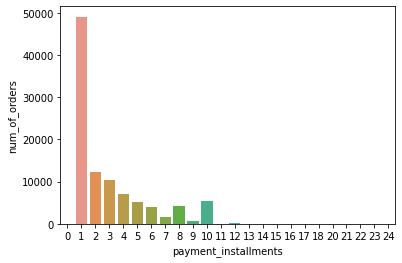

>- Disproportionately high orders placed had a single installment which meant payment in one go. 
>- It is followed by 1 and 2 installments at approx. 12000 and 10000 orders respectively
>- As number of installments increase, corresponding number of orders decrease 
>- Orders for 8 and 10 installments are higher than their neighbors 7,9 and 11 showing an anomaly 
>- max value for monthly installments is 24 although number of orders for installment above 11 are insignificant

----
____

## Actionable Insights:
>- Customer cities were only 4119 while dataset has 8011 cities. **No orders placed from roughly half of the cities**
>- Selling happens from only 611 cities against ~8000 total cities and ~4000 customer cities. It shows **sellers are concentrated in few cities only**
>- Sellers not present in 4 out of total 27 states
>- Dataset has orders ranging from **September 2016 to October 2018**
>- **Most products under bed table bath category at 3029**. Lowest number of products seen in Kitchen portable and food coach and La Cuisine at 10 products each. Top 5 categories have number of products greater than 2000. 
>- Approx **77000 reveiews out of approx 99000 were 4 and 5 stars** hinting at good quality of products sold
>- Only approx 11000 reviews out of ~99000 reviews had title/content in it. 
>- **Payment values** mean lies at 154 and maximum value is 13664. Almost 100000 payment values lie in the less than 1000 range
>-Most used **Payment Type** is credit card at 76000 orders followed by UPI at 20000 out of almost 100000 orders
>- **Trend in E-Commerce**:
>>1. Retailer has seen an almost consistent rise in e-commerce through the period September 2016 to Auguest 2018
>>2. Number of orders as well as payment value of orders saw a consistent rise on a weekly as well as monthly basis
>>3. Most orders concentrated between January and August
>>4. Highest orders scene between the months May to August
>>5. September to December see lower orders 
>>6. Highest number of orders placed during afternoon time. Lowest number of orders placed at Dawn. Morning, Evening and night have almost similar number of orders placed
>- **Evolution of E-commerce orders in the Brazil region**:
>>1. Customer State-wise and region-wise month on month number of orders and percentage change has been extracted for analysis at a granular level
>>2. Highest number of customers are from populated cities like sao paulo and rio de janeiro.
Sao paulo has disproportionately high customers at 15540 followed by Rio de janeiro at 6800
Cities immediately following these have less than 2000
>>3. State SP has the most customers at 40300 which is more than 3 times of following state RJ at 12300. As seen in histogram, almost 24 states have no_of_customers less than 5000. Out of that almost 15 states have customers less than 1000
>>4. **This shows that majority of customers (almost 64000) are residing in 3 states and rest of 30000 customers are distributed in remaining 24 states**
>- **Impact on Economy: Money movement by e-commerce by looking at order prices, freight and others**:
>>1. It can be seen that payment value increased consistently from January 2017 to january 2018
A flattening of curve can be seen from January 2018 onwards showing slowing down of sale.
>>2. January month in both the years see a huge rise in sales
>>3. **2018 saw an 136% rise in payment value compared to 2017 between Jan-Aug of each year**.
But as seen previously from monthly chart, rise mainly happened in January 2018 and sale value was flat or downtrending in rest of the year
>>4. **Highest priced products ordered by customers from SP** at 52 Lakhs followed by RJ by a high margin at 18 Lakhs
>>5. **Highest mean price of products ordered by customers from PE although they are at lowest in terms of total price**. This shows fewer products of higher worth ordered from PE
>- **Analysis on sales, freight and delivery time and categorisation based on sellers' states**
>>1. Most of the deliveries (>95000) out of almost 100000 were delivered before estimated time
>>2. Deliveries get delayed whenever time to delivery is higher
>>3. State **RO has the highest avg freight value** while SP has the lowest
>>4. State **PB has the fastest delivery** with 12.16 mean time_to_delivery
>>5. State **RO has most deliveries before estimated time** and has highest gap between estimated and actual deliveries
>>6. State **AM has the highest time to delivery** and is the **only state with more deliveries delayed than estimated** as seen from negative mean_diff_estimated_delivery 
>>7. State **RO has most deliveries before estimated time** and has highest gap between estimated and actual deliveries
>- **Payment type analysis:**
>>1. Month over Month count of orders for different payment types for each type extracted for reference. Key (each row) for the dataset is a combination of Year-Month-Payment type
>>2. Disproportionately high orders placed had a single installment which meant payment in one go. It is followed by 1 and 2 installments at approx. 12000 and 10000 orders respectively. As number of installments increase, corresponding number of orders decrease

## Recommendations:
>1. Customers and sellers are not uniformly distributed over all states or cities. **More penetration needed in states/citie with lower sellers/customers**. Reasons of low presence in those states could be investigated and addressed. Learnings from strategy in high penetration states like SP or city like sao Paulo can be implemented with
>> Distributed sellers and customers can lead to lesser delivery time as well as lower cost of shipping improving cost to business as well as environment

>2. Most reviews had only ratings and no title/content. **Written reviews can be promoted with incentives** so as to improve customer experience and promote sales.

>3. **Most orders were focussed between January and August** in 2017 and 2018. Reasons behind lesser orders between September and December could be either seasonal or error in data collection. It **needs to be looked into and addressed promptly** for better and continuous analysis.

>4. Highest number of orders seen between May and August but highest rise in order value seen in January in both years. This **seasonality needs to be utilised to maximum capacity with more variety and quantity of products along with special sales offers.** 
>>- Similar pattern is also observed in time of the day when most orders are executed. Afternoon time is when most orders are placed and limited time lightning deals could be introduced in those times to utilise this pattern to maximu potential

>5. State wise and region-wise month on month order numbers can be used for **analysing patterns issues local to each state and region**. This can help devising region specific strategies for improving sales

>6. **January 2018 onwards the sales (calculated based on payment value) saw falttening** and then a slump compared to 2017. Reasons could either be specific to business, region or global. It is not a healthy sign for business and **relevant action may be taken to avoid further slowdown in sales.** 

>7. Some states like SP at highest orders by payment value have very low mean value of products whereas state like PE has low total value but highest average value shows finer difference in demand for products. SP may have more number of orders of lower price while PE has fewer orders of much higher value. Such information is useful in **making supply chain decisions to create hubs for relevant products based on requirement**
>>- Similar **analysis can be done on mean dimensions for products to improve handling infrastructure** at hubs.

>8. Most deliveries (>90%) were made in time with mean difference in actual and estiated time of delivery being 12.4 days. **Estimated time calculation can be further optimised to get closer values to actual time** of delivery. This helps in improving predictability for customers, sellers and business too. 

>9. **States with higher freight value need improvement in transport infrastructure to reduce cost of shipping**. 

>10. Most payments were made in single or double installments. This signifies customers belong to higher income groups who can afford single installments. This is a sign of lower penetration into low income groups who prefer paying in installments. This provides opportunity for **growth of business by providing no-interest loans in partnership with banks to lower income groups**. It is an unexplored market and provides huge potential for growth. 